## **Bringing in the libraries**

In [1]:
print('Importing Libraries')
import pandas as pd
import numpy as np
import requests
import os
import folium 
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns

print('Libaries Imported!')

Importing Libraries
Libaries Imported!


#### **_Creating Variables of Location_**

In [2]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="abhi_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

In [3]:
radius=1000
LIMIT=100
CLIENT_ID = 'BPMFIEXXXXXXXXXXXXXXXXXXXXXXXXXXXXMT1GPKCETSINV'
CLIENT_SECRET = 'MTBKWV5TXXXXXXXXXXXXXXXXXXXXXXXXXXXCCXYI0TVXOIJ'
VERSION = '20200402'  

## Declaring Functions ->

#### Function for getting a DF with nearby 100 venues for top rating places

In [4]:
def get_venues(lat,lng):
    
    #set variables
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,VERSION,lat,lng,radius,LIMIT)
    
    # get all the data
    results = requests.get(url).json()

    if (results["response"] != None and results["response"]['groups'] != None):
        venue_data=results["response"]['groups'][0]['items']
        venue_details=[]
        for row in venue_data:
            try:
                venue_id=row['venue']['id']
                venue_name=row['venue']['name']
                venue_category=row['venue']['categories'][0]['name']
                venue_details.append([venue_id,venue_name,venue_category])
            except KeyError:
                pass

        column_names=['ID','Name','Category']
        df = pd.DataFrame(venue_details,columns=column_names)
    return df

#### Function to get the information about place

In [5]:
def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(venue_id,CLIENT_ID,CLIENT_SECRET,VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

#### Function to get the details of NewYork city

In [6]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

#### Getting the Lattitude longitude data for NewYork City

In [7]:
new_york_data=get_new_york_data()
new_york_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [10]:
new_york_data.shape

(306, 4)

#### Creating the bar graph plot

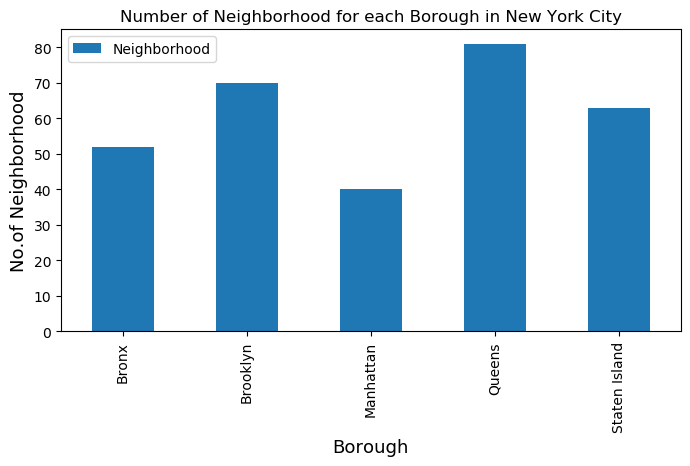

In [11]:
plt.figure(figsize=(8,4), dpi = 100)

plt.title('Number of Neighborhood for each Borough in New York City')

plt.xlabel('Borough', fontsize = 13)

plt.ylabel('No.of Neighborhood', fontsize=13)

new_york_data.groupby('Borough')['Neighborhood'].count().plot(kind='bar')

plt.legend()

plt.show()

With this we see that Queens has highest number of neighborhoods around New York City

collecting American resturants for each Neighborhood.......

#### Preparing a list of Neighborhoods

In [12]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
amer_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in new_york_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    amer_resturants=venues[venues['Category']=='American Restaurant']   
    for resturant_detail in amer_resturants.values.tolist():
        id, name , category=resturant_detail
        amer_rest_ny = amer_rest_ny.append({'Borough': Borough,'Neighborhood': Neighborhood,'ID': id,'Name' : name},ignore_index=True)
    count+=1

KeyError: 'groups'

In [13]:
amer_rest_ny.head()

,Borough,Neighborhood,ID,Name
